In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(3656, 16)
      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
3651     1   58        3.0              0         0.0     0.0   
3652     1   68        1.0              0         0.0     0.0   
3653     1   50        1.0              1         1.0     0.0   
3654     1   51        3.0              1        43.0     0.0   
3655     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    2

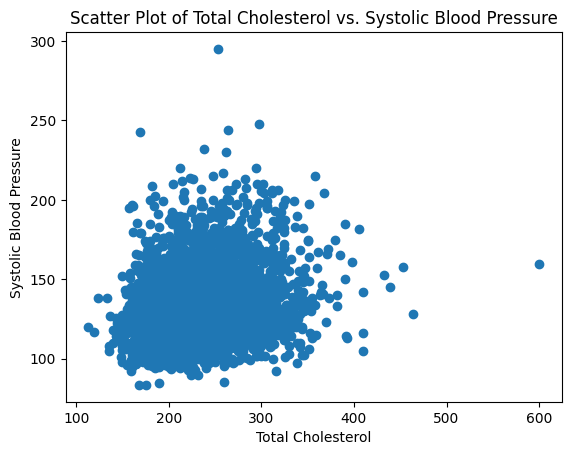

Correlation coefficient: df['totChol'].corr(df['sysBP']= PearsonRResult(statistic=0.2201295812706486, pvalue=2.3133396363100536e-41)


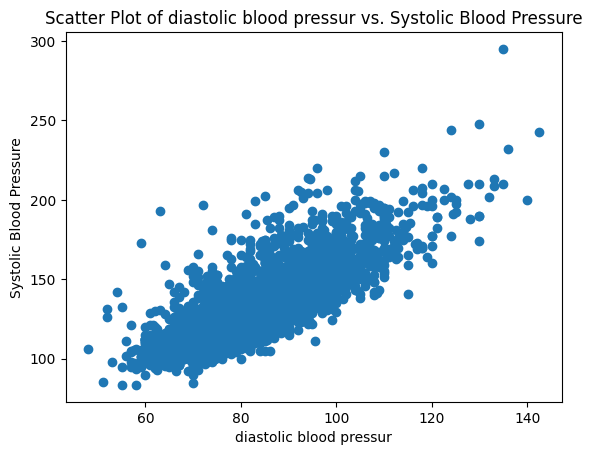

Correlation coefficient: df['diaBP'], df['sysBP']= 0.786727121865263
sysBP-diaBP :0.786727121865263
Number of pairs of variables with at most a weak linear relationship: 27
            cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
cigsPerDay       1.000   -0.030 -0.095 -0.057 -0.087      0.064   -0.054   
totChol         -0.030    1.000  0.220  0.175  0.121      0.093    0.050   
sysBP           -0.095    0.220  1.000  0.787  0.331      0.185    0.135   
diaBP           -0.057    0.175  0.787  1.000  0.386      0.179    0.064   
BMI             -0.087    0.121  0.331  0.386  1.000      0.074    0.084   
heartRate        0.064    0.093  0.185  0.179  0.074      1.000    0.097   
glucose         -0.054    0.050  0.135  0.064  0.084      0.097    1.000   
age             -0.189    0.268  0.389  0.209  0.137     -0.003    0.118   

              age  
cigsPerDay -0.189  
totChol     0.268  
sysBP       0.389  
diaBP       0.209  
BMI         0.137  
heartRate  -0.003  
gl

KeyError: 'male'

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency


df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataMining/framingham.csv");

#print(list(df1.columns))
# 1. Create a dataset with the numerical variables
# Select only the numerical columns

#sex_mapping = {'Female': 0, 'Male': 1}

# Map the values in the 'sex' column to numeric representations
#df1['sex_numeric'] = df1['male'].map(sex_mapping)

df = df1.select_dtypes(include=['int64', 'float64'])
df = df.dropna()
print(df.shape);
#df.reset_index(drop=True, inplace=True); # delete row names
#print(df)


# Display the numerical dataset
#print(df)
#print(df.shape[0]) #row number
print(list(df.columns))
print(len(df.columns))



# 2. Generate a scatter plot for total cholesterol and systolic blood pressure. Comment on
# it. Hint use scatter from matplotlib?
# Create a scatter plot
plt.scatter(df['totChol'], df['sysBP'])

# Set plot labels and title
plt.xlabel('Total Cholesterol')
plt.ylabel('Systolic Blood Pressure')
plt.title('Scatter Plot of Total Cholesterol vs. Systolic Blood Pressure')

# Show the plot
plt.show()

#3. Calculate the correlation between the variables in question 2. Comment on it.
import scipy.stats
np.corrcoef(df['totChol'], df['sysBP'])
correlation = scipy.stats.pearsonr(df['totChol'], df['sysBP'])
# Calculate the correlation coefficient between 'totChol' and 'sysBP'

#Pearson’s correlation
#correlation = df['totChol'].corr(df['sysBP'])

print("Correlation coefficient: df['totChol'].corr(df['sysBP']=", correlation)
#0.20890778923685657 weak


#4. Generate a scatter plot for diastolic blood pressure and systolic blood pressure.
#Calculate the correlation coefficient. Comment on your findings.


plt.scatter(df['diaBP'], df['sysBP'])

# Set plot labels and title
plt.xlabel('diastolic blood pressur')
plt.ylabel('Systolic Blood Pressure')
plt.title('Scatter Plot of diastolic blood pressur vs. Systolic Blood Pressure')

# Show the plot
plt.show()
correlation = df['diaBP'].corr(df['sysBP'])

print("Correlation coefficient: df['diaBP'], df['sysBP']=", correlation)
#0.7840020914320168  strong

#5. How many pair of variables have at most a weak linear relationship?
weak_threshold = 0.399  # Adjust this threshold as needed

# Initialize a counter for pairs with at most a weak linear relationship
weak_relationship_count = 0
strong_relationship_count = 0

# Iterate through all pairs of numerical columns
for i in range(len(df.columns)):
    for j in range(i + 1, len(df.columns)):
        # Calculate the correlation coefficient
        correlation = df[df.columns[i]].corr(df[df.columns[j]])
        # Check if the correlation coefficient is less than the threshold
        if abs(correlation) < weak_threshold:
            weak_relationship_count += 1
        else:
            strong_relationship_count +=1
            print("{}-{} :{}".format(df.columns[i],df.columns[j],correlation))


print("Number of pairs of variables with at most a weak linear relationship:", weak_relationship_count)

#standard answer
corr = df.corr(); # we can also use np.corrcoef(dfc)
print(round(corr,3));

print("Pair of variables that has at most a weak positive relationship: ", ((np.absolute(corr) < 0.399).sum()).sum()/2);

#6. Are the means of the average number of cigarettes smoked per day different for males
#and female? Define the corresponding hypotheses and test them. Comment on your
#findings.

gender_cigsPerDay_mean = df.groupby("male")["cigsPerDay"].mean()
print("#6 {}".format(gender_cigsPerDay_mean))

strong_threshold = 0.05
male_data = df[df['male']==1]['cigsPerDay']
female_data = df[df['male']==0]['cigsPerDay']

# Perform one-way ANOVA
f_statistic,p_value = f_oneway(male_data, female_data)
print("gendar vs cigarettes, p_value:",p_value)
if p_value < strong_threshold:
  print("very strong evidence against, gender impact cigsPerDay")
else:
  print("none evidence against, gender doesn impact cigsPerDay")
  #2.415048993730673e-94
  # None evidence against H0, but not neccesarily means that




#7. Are prevalent stroke and sex not independent? Define the corresponding hypotheses
#and test them. Comment on your findings.
#prevalentStroke
gender_prevalentStroke_mean = df.groupby("male")["prevalentStroke"].mean()
print("#7 {}".format(gender_prevalentStroke_mean))

#male_data = df[df['male']==1]['prevalentStroke']
#female_data = df[df['male']==0]['prevalentStroke']

# Perform one-way ANOVA
#f_statistic,p_value = f_oneway(male_data, female_data)
#print("gendar vs prevalentStroke, p_value:",p_value)
#contingency_table = pd.crosstab(df['male'], df['prevalentStroke'])
#print(contingency_table)
# 0.8890736499556718

contingency_table = pd.crosstab(df['male'], df['prevalentStroke'])
print(contingency_table)


# Perform the chi-square test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("gendar vs prevalentStroke, p_value:",p_value)

strong_threshold = 0.001

if p_value < strong_threshold:
  print("very strong evidence against, gender and prevalentStroke are independent")
else:
  print("none evidence against, gender and prevalentStroke are not independent")




#8. If 10 year risk of coronary heart disease is the target variable, i.e., we want to explain
#this variable as function of the rest of variables, do we have enough evidence to remove
#the variable sex from the analysis? Justify your answer.

#TenYearCHD
print("#8==")
# Create a contingency table
#new_df = df[["male"],["TenYearCHD"]].astype("category")
contingency_table = pd.crosstab(df['male'], df['TenYearCHD'])
print(contingency_table)

# Perform the chi-square test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("gendar vs TenYearCHD, p_value:",p_value)
# 0.8890736499556718
strong_threshold = 0.001
if p_value < strong_threshold:
  print("very strong evidence against, gender impact TenYearCHD are independent")
else:
  print("none evidence against, gender doesn't impact TenYearCHD are not independent")







In [ ]:
print("#9. Calculate the principal components for the continuous variables.")
print("#a. Is it necessary the standardisation of the variables?")
print("necessary the standardisation of the variables")
# Separating out the continuous features
features=["age","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]
x = df.loc[:, features].values
#x = df
# Standardizing the features
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

#x = (x - x.mean()) / x.std()


#9. Calculate the principal components for the continuous variables.
#a. Is it necessary the standardisation of the variables?
necessary the standardisation of the variables


#b. How many principal components are enough to represent the original variables?
[[-1.69670346  0.12857343 -0.17235986 ... -0.91860799 -0.14071858
   0.09988554]
 [ 0.17439917  0.50411733  0.412681   ... -1.15643488 -0.30296877
  -0.1604125 ]
 [-0.51552361  0.55219783 -0.14624965 ... -0.05533543 -0.16537186
   0.05531786]
 ...
 [ 2.06378353 -0.79282964 -0.25032179 ...  0.01873878  1.58492285
   1.00896834]
 [-1.56818709  1.19283825 -0.23944149 ...  1.71822018 -0.45013557
  -0.10625631]
 [ 0.27417726 -0.71582875  1.39630281 ...  0.44310881  0.7825134
  -0.13508091]]
[0.30206849 0.44723001 0.57473099 0.69625348 0.80100361 0.89794516
 0.97676075 1.        ]


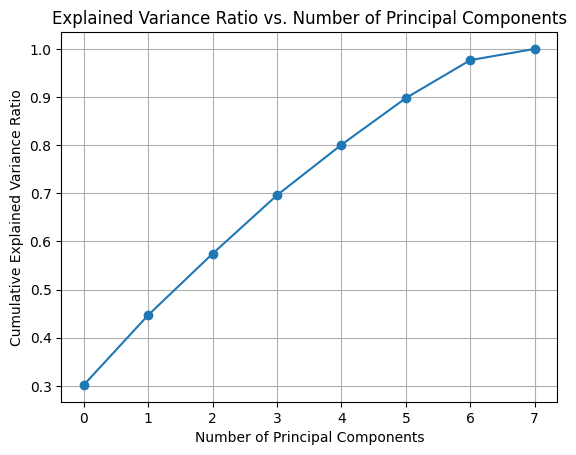

In [ ]:
print("#b. How many principal components are enough to represent the original variables?")
#Comment on it.
# PCA
from sklearn.decomposition import PCA

#pca = PCA(n_components=8)
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)
print(principalComponents)
# Explained variance ratio
explained_variance_ratio =np.cumsum(pca.explained_variance_ratio_)

print(explained_variance_ratio)

# Plot explained variance ratio
plt.plot(explained_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()


#c. Plot the first 2 components according to the gender. Comment on it
3656
[[-1.69670346  0.12857343 -0.17235986 ... -0.91860799 -0.14071858
   0.09988554]
 [ 0.17439917  0.50411733  0.412681   ... -1.15643488 -0.30296877
  -0.1604125 ]
 [-0.51552361  0.55219783 -0.14624965 ... -0.05533543 -0.16537186
   0.05531786]
 ...
 [ 2.06378353 -0.79282964 -0.25032179 ...  0.01873878  1.58492285
   1.00896834]
 [-1.56818709  1.19283825 -0.23944149 ...  1.71822018 -0.45013557
  -0.10625631]
 [ 0.27417726 -0.71582875  1.39630281 ...  0.44310881  0.7825134
  -0.13508091]]
        PC1       PC2       PC3  gender
0 -1.696703  0.128573 -0.172360     1.0
1  0.174399  0.504117  0.412681     0.0
2 -0.515524  0.552198 -0.146250     1.0
3  1.372300  0.361976 -0.055223     0.0
4 -0.093230  1.095173  0.980434     0.0


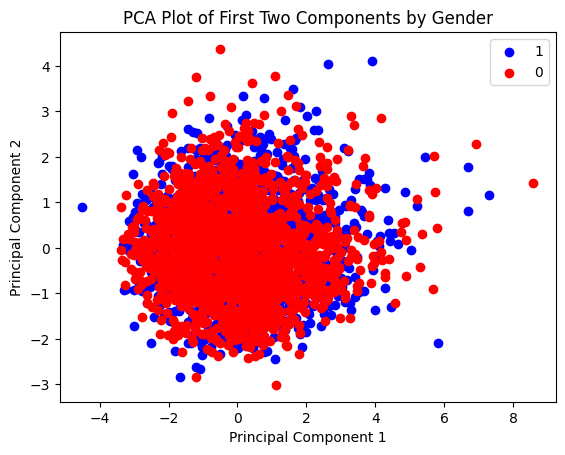

In [ ]:
print("#c. Plot the first 2 components according to the gender. Comment on it")

print(len(principalComponents))
print(principalComponents)

#PCs = pd.DataFrame(data = principalComponents,
#columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"])
#print(PCs[["PC1","PC2"]])

#print(pca.components_)
#corr_matrix = df[features].corr()
#print(corr_matrix)


# Separating features and labels

y = df['male']

# Create a DataFrame with principal components and gender
pc_df = pd.DataFrame(data=principalComponents[:, :3], columns=['PC1', 'PC2','PC3'])

pc_df['gender'] = y
print(pc_df.head())

# Plot
fig, ax = plt.subplots()
colors = {1: 'blue', 0: 'red'}
for gender, color in colors.items():
    gender_data = pc_df[pc_df['gender'] == gender]
    ax.scatter(gender_data['PC1'], gender_data['PC2'], c=color, label=gender)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA Plot of First Two Components by Gender')
ax.legend()
plt.show()


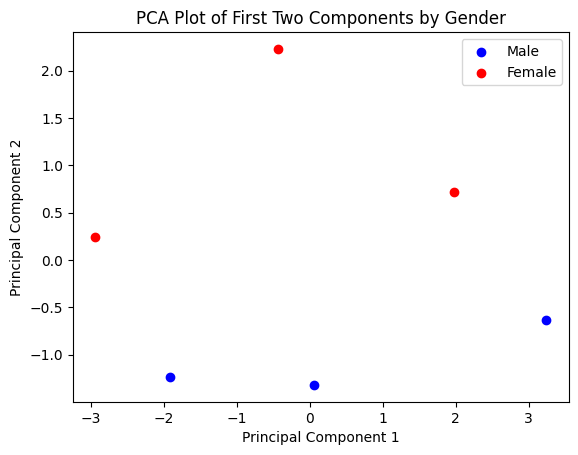

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming you have your data loaded into a DataFrame named 'data' with columns 'gender' and 'features'
# Example data
data = pd.DataFrame({
    'gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'age': [25, 35, 45, 55, 65, 75],
    'cigsPerDay': [10, 15, 5, 20, 0, 10],
    'totChol': [200, 220, 180, 240, 190, 200],
    'sysBP': [120, 130, 140, 150, 160, 170],
    'diaBP': [80, 85, 90, 95, 100, 105],
    'BMI': [22, 25, 30, 28, 26, 27],
    'heartRate': [70, 75, 80, 85, 90, 95],
    'glucose': [90, 100, 110, 120, 130, 140]
})

# Separating features and labels
X = data.drop('gender', axis=1)
y = data['gender']

# Standardize the features
X_standardized = (X - X.mean()) / X.std()

# Perform PCA
pca = PCA(n_components=2)  # Choosing the first 2 components
principal_components = pca.fit_transform(X_standardized)

# Create a DataFrame with principal components and gender
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pc_df['gender'] = y

# Plot
fig, ax = plt.subplots()
colors = {'Male': 'blue', 'Female': 'red'}
for gender, color in colors.items():
    gender_data = pc_df[pc_df['gender'] == gender]
    ax.scatter(gender_data['PC1'], gender_data['PC2'], c=color, label=gender)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA Plot of First Two Components by Gender')
ax.legend()
plt.show()


[6.84819735e-01 2.31964970e-01 8.29790488e-02 2.36246293e-04
 1.21707374e-34]


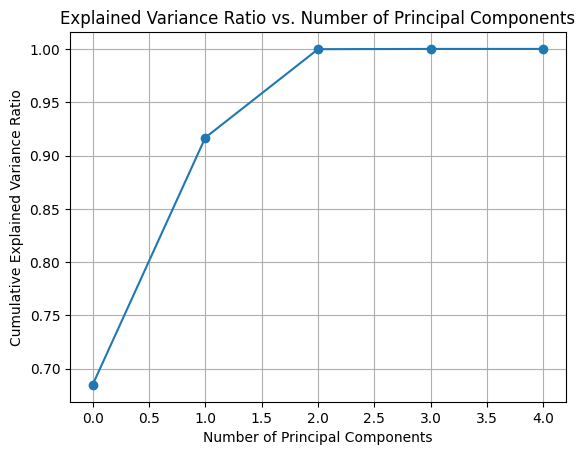

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming you have your data loaded into a DataFrame named 'data'
# Example data
data = pd.DataFrame({
    'age': [25, 35, 45, 55, 65],
    'cigsPerDay': [10, 15, 5, 20, 0],
    'totChol': [200, 220, 180, 240, 190],
    'sysBP': [120, 130, 140, 150, 160],
    'diaBP': [80, 85, 90, 95, 100],
    'BMI': [22, 25, 30, 28, 26],
    'heartRate': [70, 75, 80, 85, 90],
    'glucose': [90, 100, 110, 120, 130]
})

# Standardize the data
data_standardized = (data - data.mean()) / data.std()

# Perform PCA
pca = PCA()
pca.fit(data_standardized)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

print(explained_variance_ratio)

# Plot explained variance ratio
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()


100.0
38.0
